# Project

In [ ]:
# --- 📦 Standard Python Libraries --- #

import os                            # For file and directory operations
from platform import python_version  # To check Python version


# --- 📊 Data Manipulation and Visualization --- #

import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations

import matplotlib                    # For configuring plotting backend
import matplotlib.pyplot as plt      # For plotting figures
import seaborn as sns                # For statistical visualizations

# Enable inline plotting in Jupyter Notebook
%matplotlib inline


# --- ⚙️ Profiling --- #
from ydata_profiling import ProfileReport  # For automated EDA reports


# --- 📁 Project Configuration --- #

# Load project-specific paths and custom visual settings
from config import (
    project_folder,     # Main project directory
    original_data,      # Path to raw/original data
    rgb_color,          # Custom RGB color for plots
    palette             # Custom palette for plot hues
)


In [2]:
libraries = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
    "Scipy": scipy
}

print("Library Versions:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Library':^20} | {'Version':^10}")
print(f"{'':-^20} | {'':-^10}")

for name, lib in sorted(libraries.items()):
    print(f"{name:<20} | {lib.__version__:>10}")

print()
print(f"Python's version: {python_version()}")

Library Versions:

-------------------- | ----------
      Library        |  Version  
-------------------- | ----------
Matplotlib           |     3.10.0
NumPy                |      2.1.3
Pandas               |      2.2.3
Scikit-Learn         |      1.6.1
Scipy                |     1.15.3
Seaborn              |     0.13.2

Python's version: 3.12.10


# Data

## Infos

In [5]:
# Get data
df = pd.read_csv(original_data)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Get summary info about the DataFrame: number of entries, columns, non-null values, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Get basic statistics for all numeric columns (count, mean, std, min, 25%, 50%, 75%, max)

with pd.option_context("display.float_format", "{:.2f}".format):
    display(print(df.describe()))

       CustomerID    Age  Annual Income (k$)  Spending Score (1-100)
count      200.00 200.00              200.00                  200.00
mean       100.50  38.85               60.56                   50.20
std         57.88  13.97               26.26                   25.82
min          1.00  18.00               15.00                    1.00
25%         50.75  28.75               41.50                   34.75
50%        100.50  36.00               61.50                   50.00
75%        150.25  49.00               78.00                   73.00
max        200.00  70.00              137.00                   99.00


None

In [8]:
# Get summary statistics for non-numeric (categorical/object) columns: count, unique, top, freq
print(df.describe(exclude="number"))

        Gender
count      200
unique       2
top     Female
freq       112


In [9]:
# Count the frequency of each unique value in the 'diagnosis' column (absolute count)
print(df["Gender"].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


In [10]:
# Check for missing values in each column
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Generate the EDA profile report from the DataFrame
profile = ProfileReport(df)

# Export the report as an HTML file to the specified path
profile.to_file("../Reports/eda_supermercado.html")

In [12]:
# Create a copy of the original DataFrame to keep it intact
df_analise = df.copy()

# Drop the 'CustomerID' column as it's likely not useful for analysis
df_analise = df_analise.drop("CustomerID", axis=1)

# Display the first five rows of the updated DataFrame
print(df_analise.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


## Graphs

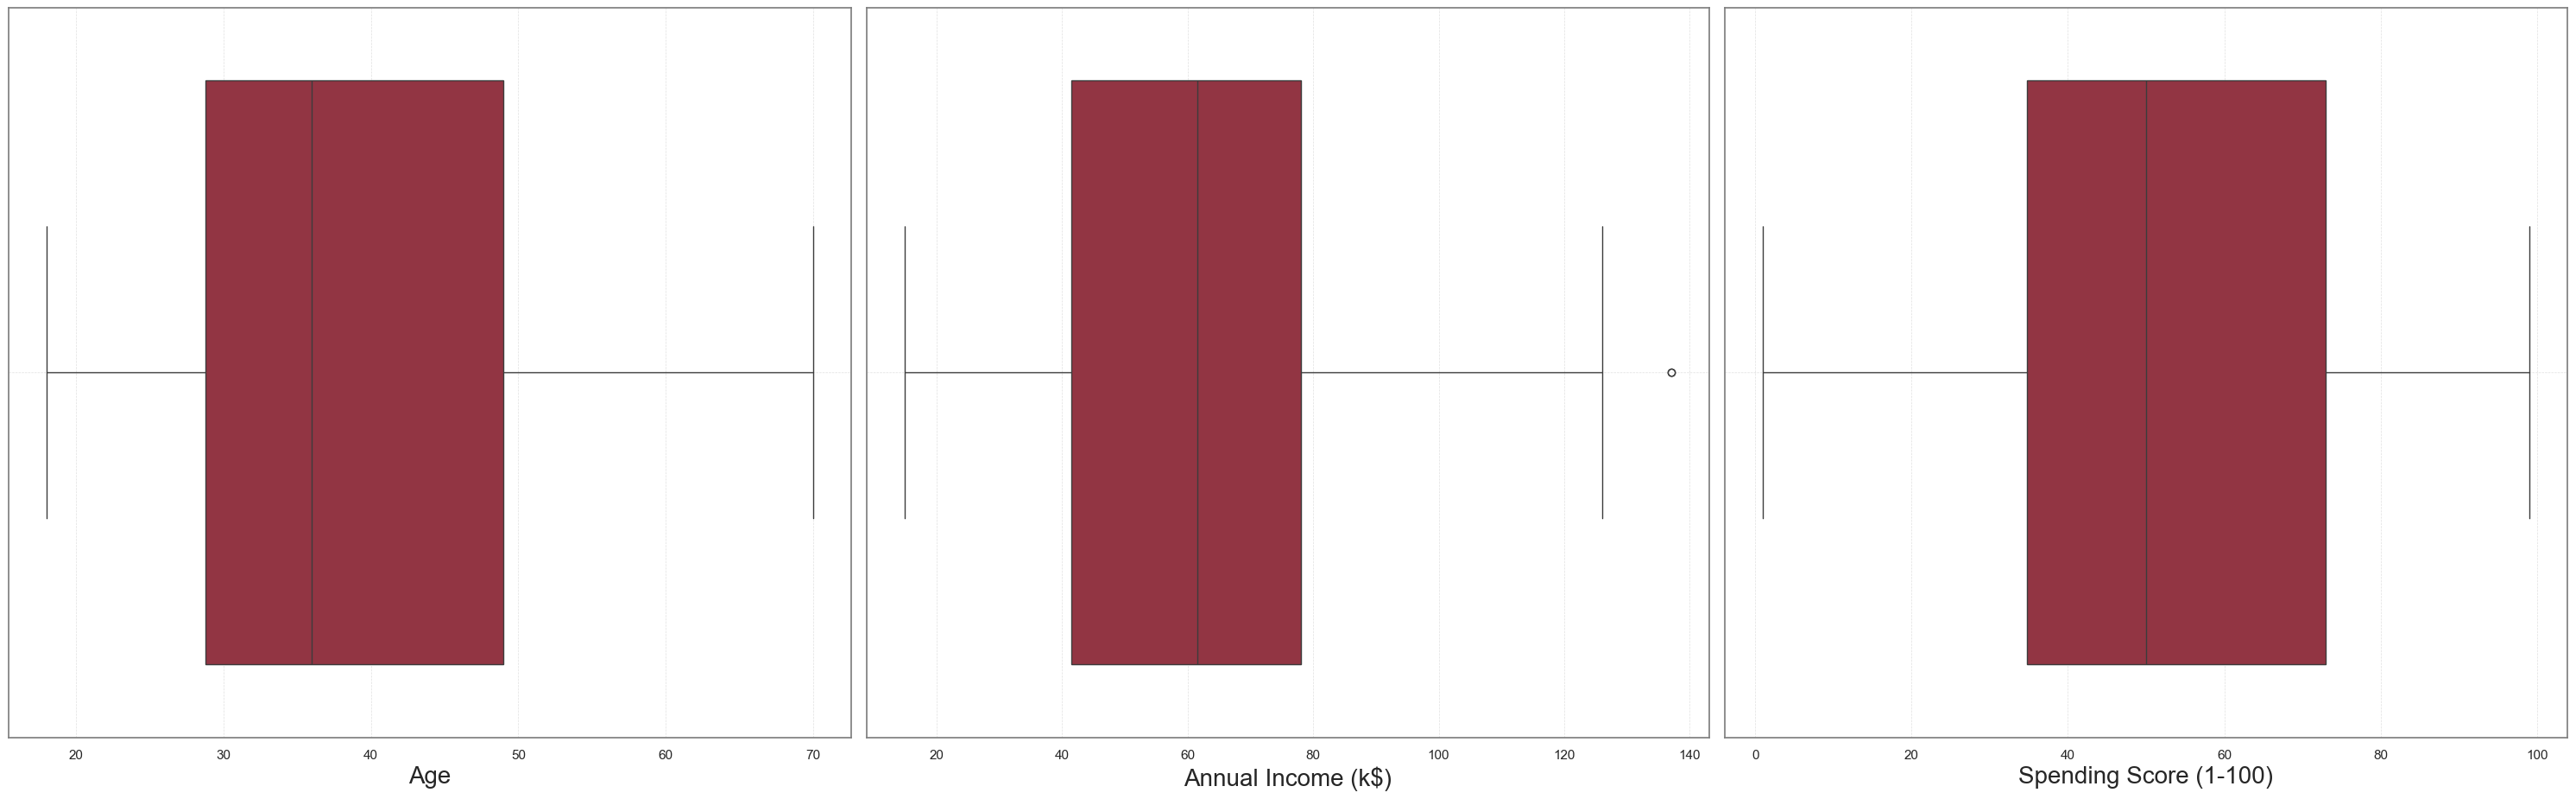

In [20]:
# Boxplots

# Set a clean style with soft grid lines
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "grid.color": "lightgray",
    "grid.linewidth": 0.5,
    "axes.edgecolor": "gray"
})

# Create boxplots for all numeric columns
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Add main title
fig.suptitle("", fontsize=16, fontweight='bold', color=rgb_color)

# Plot each numeric column (horizontal boxplots)
for ax, column in zip(axs.flatten(), df_analise.select_dtypes("number").columns):
    sns.boxplot(x=column, data= df_analise, ax=ax, color=rgb_color, linewidth=1)
    # ax.set_title(column, fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor("white")
    ax.set_xlabel(column, fontsize= 20)  # Optional: hide x-axis label
    ax.set_ylabel("")  # Optional: hide y-axis label

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

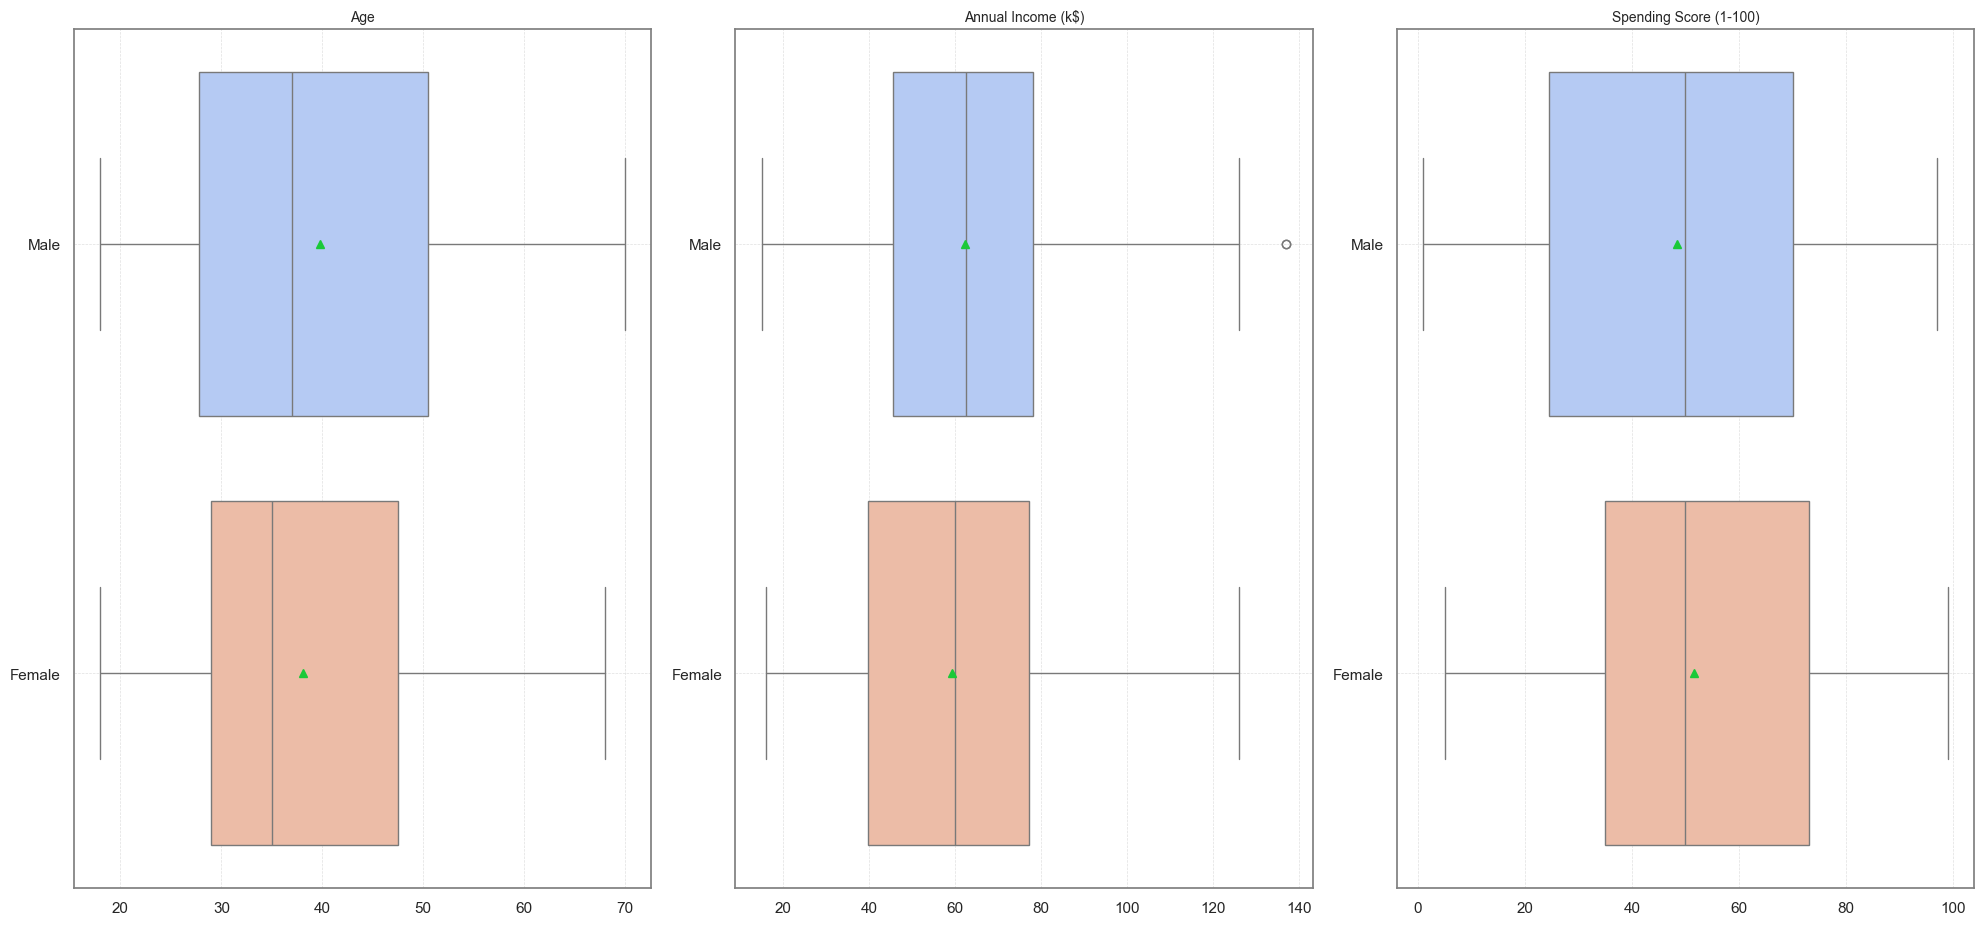

In [21]:
# Set clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "grid.color": "lightgray",
    "grid.linewidth": 0.5,
    "axes.edgecolor": "gray"
})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Add main title
fig.suptitle("", fontsize=16, fontweight='bold', color=rgb_color)

# Plot each numeric variable as horizontal boxplot
for ax, column in zip(axs.flatten(), df_analise.select_dtypes("number").columns):
    sns.boxplot(
        x=column,
        y="Gender",
        data=df_analise,
        ax=ax,
        showmeans=True,
        hue="Gender",
        linewidth=1,
        palette=palette
    ) 
    ax.set_title(column, fontsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor("white")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

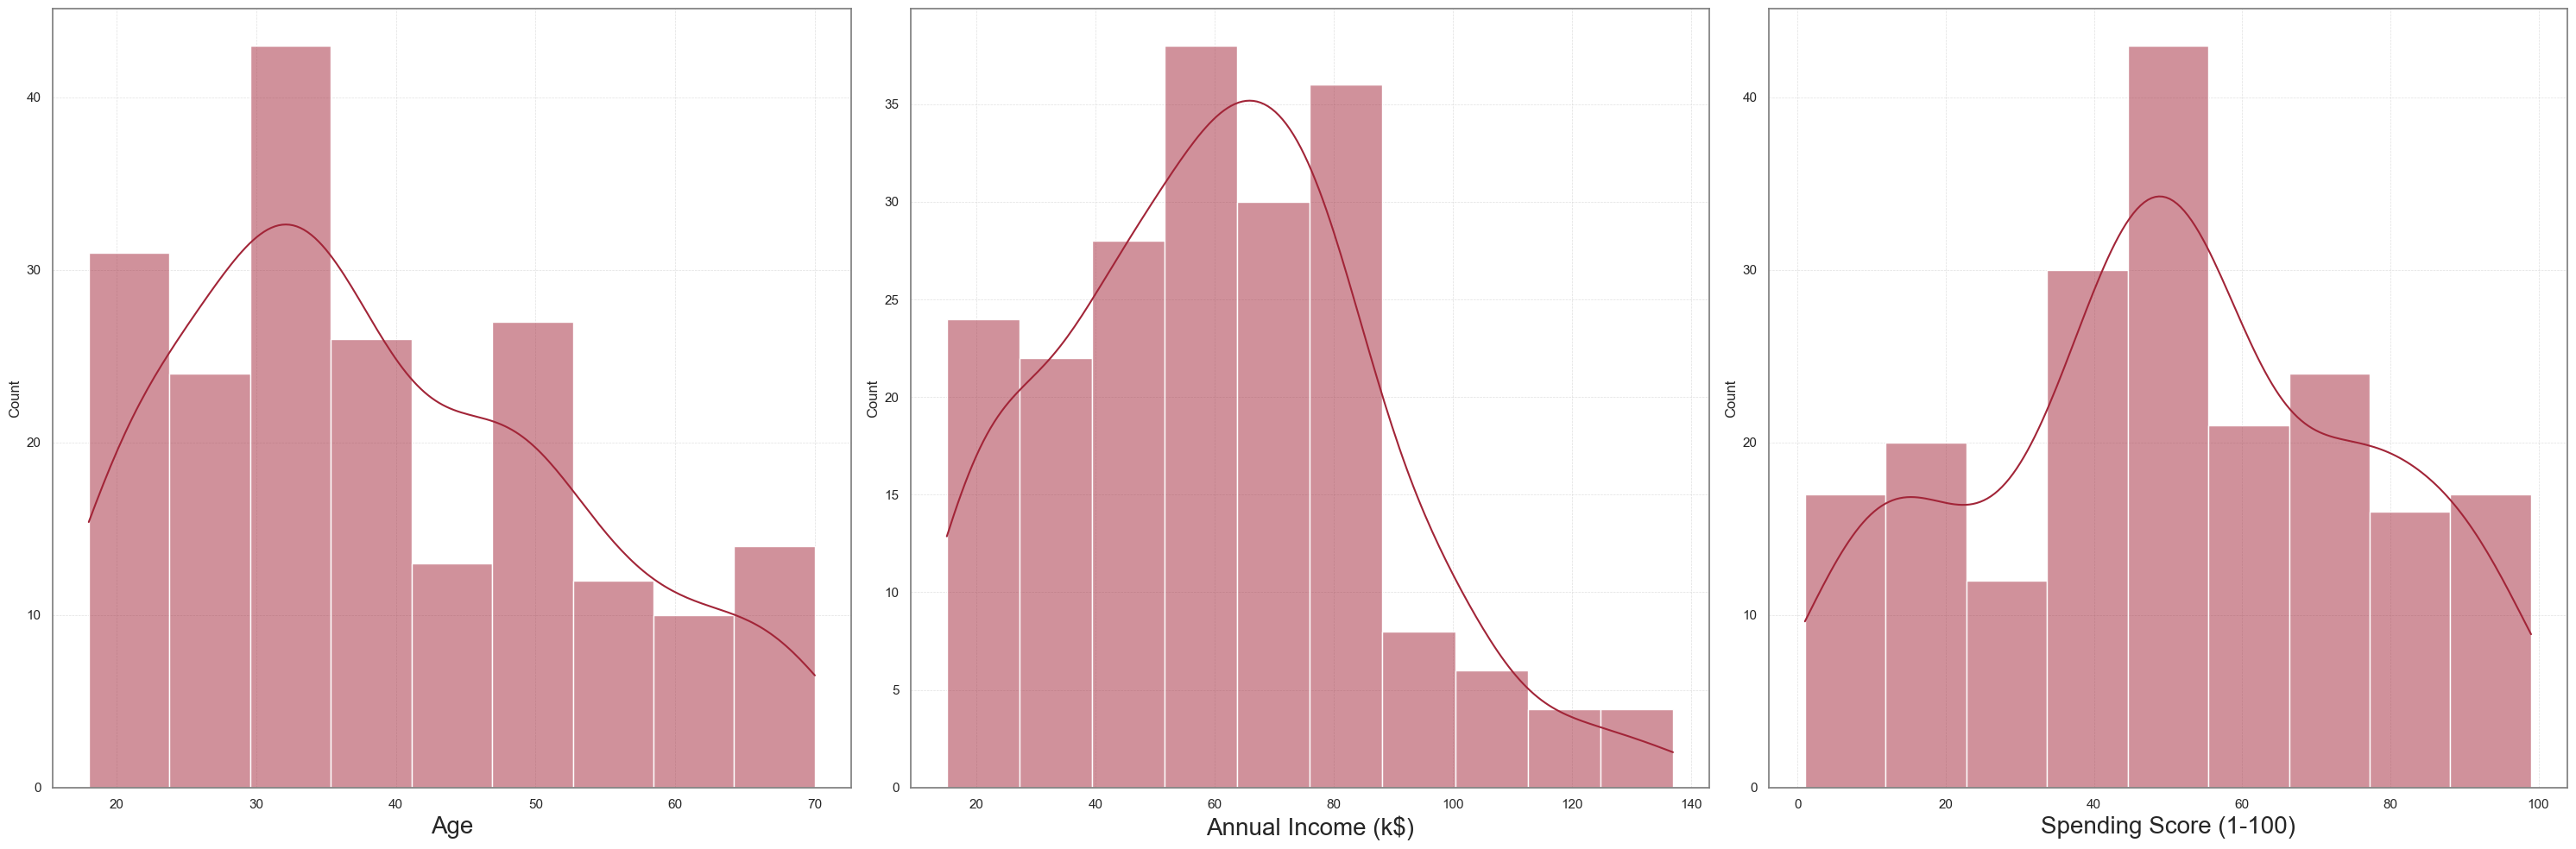

In [22]:
# Histograms

# Set a clean style with soft grid lines
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": "white",      # white plot background
    "figure.facecolor": "white",    # white figure background
    "grid.color": "lightgray",      # soft grid color
    "grid.linewidth": 0.5,          # thin grid lines
    "axes.edgecolor": "gray"        # light axis edges
})

# Create histograms for all numeric columns
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

for ax, column in zip(axs.flatten(), df_analise.select_dtypes("number").columns):
    sns.histplot(x=column, ax=ax, data= df_analise, kde=True, color=rgb_color)
    ax.set_xlabel(column, fontsize= 20)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_facecolor("white")

plt.tight_layout()
plt.show()


In [23]:
# Display the Spearman correlation matrix with 3 decimal places for all numeric columns
with pd.option_context("display.float_format", "{:.3f}".format):
    display(print(df_analise.corr(numeric_only=True, method="spearman")))

                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000               0.020                  -0.345
Annual Income (k$)      0.020               1.000                   0.008
Spending Score (1-100) -0.345               0.008                   1.000


None

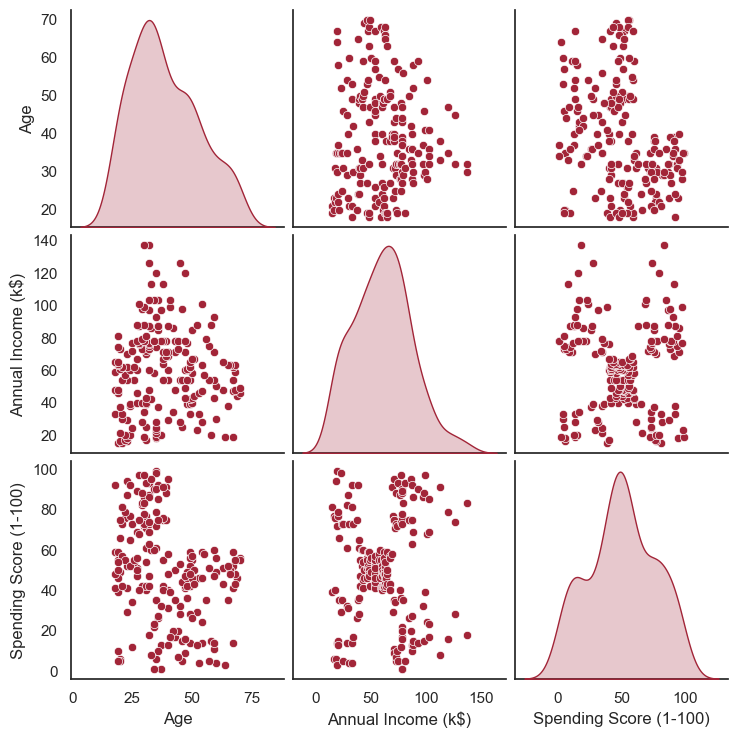

In [24]:
# Generate a pairplot using the specified RGB color, removing gridlines and using KDE for diagonal plots

# Set style without gridlines
sns.set_style("white")

# Create a pairplot with custom RGB color and no grid
sns.pairplot(
    df_analise,
    diag_kind="kde",
    plot_kws={"color": rgb_color},
    diag_kws={"color": rgb_color}
)


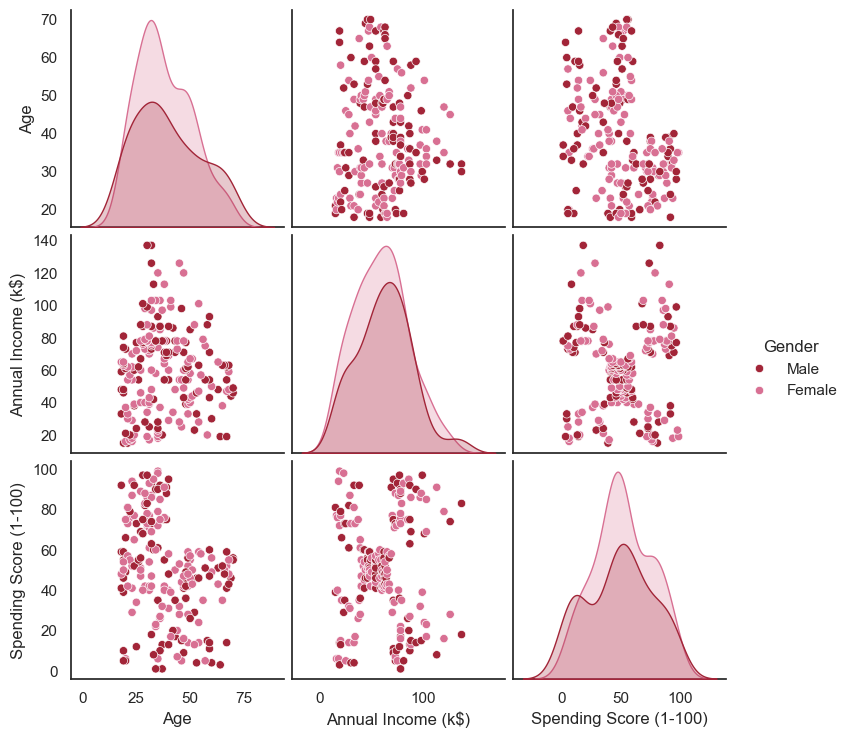

In [25]:
# Generate a pairplot with KDE on the diagonal and color-coded by Gender using a custom RGB palette, without gridlines

# Set clean style without grid
sns.set_style("white")

# Define custom color palette for hue levels (e.g., "Male", "Female")
custom_palette = {
    "Male": rgb_color,
    "Female": "#D87093"  # exemplo: rosa suave para contraste
}

# Create pairplot with KDE on diagonals and hue by Gender
sns.pairplot(
    df_analise,
    diag_kind="kde",
    hue="Gender",
    palette=custom_palette
)


In [26]:
# Export the DataFrame to a CSV file without the index column
df_analise.to_csv("../Data/Mall_Customers_no_CustomerID.csv", index=False)